In [114]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Parameters
N = 64
steps = 60
loops = 3

In [116]:
# Initial state
psi = np.zeros((N,N + loops - 1))
for i in range(N):
    for j in range(N + loops - 1):
            psi[i][j] = 1/np.sqrt(N*(N + loops - 1))
print(psi)

[[0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]
 [0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]
 [0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]
 ...
 [0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]
 [0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]
 [0.01538644 0.01538644 0.01538644 ... 0.01538644 0.01538644 0.01538644]]


In [117]:
# Specify the marked vertex
a = 0

In [118]:
# Create an array to store the probabilities.
prob = np.zeros(steps+1)

# Print the probability at the marked vertex
prob[0] = np.sum(np.square(psi[a][:]));
#print(0,"\t",prob[0])

for t in range(steps):
    # Query the oracle.
    for i in range(N + loops - 1):
        psi[a][i] *= -1
    
    # Temporary variable.
    tmp = np.zeros((N,N + loops - 1))

    # Apply the Grover coin
    for i in range(N):
        # Calculate the average amplitude at this vertex.
        avg = 0
        for j in range(N + loops - 1):
            avg += psi[i][j]
        avg /= N + loops - 1
    
        # Invert each amplitude about this average.
        for j in range(N + loops - 1):
            tmp[i][j] = 2*avg - psi[i][j]
    
    # Flip-Flop Shift
    for i in range(N):
        for j in range(N):
            psi[i][j] = tmp[j][i]
        for j in range(N, N + loops - 1):
            psi[i][j] = tmp[i][j]
            
    # Print the probability at the marked vertex
    prob[t+1] =  np.sum(np.square(psi[a][:]))
    #print(t+1,"\t",prob[t+1])

(0.0, 1.0)

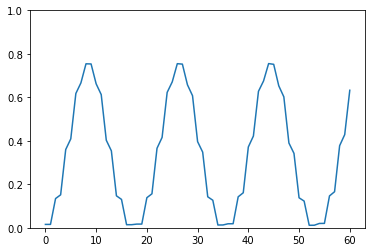

In [119]:
plt.plot(prob)
plt.ylim([0,1])